# Music - genre - classification

we will use this model for making a music recommendation system based on user genre input.

 Our Datasets contains 10 genres:-
- Blues
- Classical
- Country
- Disco
- Hiphop
- Jazz
- Metal
- Pop
- Reggae
- Rock

https://huggingface.co/datasets/marsyas/gtzan

# Dataset Summary
GTZAN is a dataset for musical genre classification of audio signals. The dataset consists of 1,000 audio tracks, each of 30 seconds long. It contains 10 genres, each represented by 100 tracks. The tracks are all 22,050Hz Mono 16-bit audio files in WAV format. The genres are: blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, and rock.


# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import tensorflow as tf
import librosa
import IPython.display as ipd

# Loading Dataset

In [2]:
df = pd.read_csv(r'D:\AAAAAA\2\Data/features_3_sec.csv')
df.head(30)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,blues.00000.5.wav,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,blues.00000.6.wav,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,blues.00000.7.wav,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,blues.00000.8.wav,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,blues.00000.9.wav,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


# Exploring The Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [4]:
df.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [5]:
df.label.value_counts().reset_index()

,label,count
0,blues,1000
1,jazz,1000
2,metal,1000
3,pop,1000
4,reggae,1000
5,disco,999
6,classical,998
7,hiphop,998
8,rock,998
9,country,997


# Define the feature extraction function

In [ ]:
def extract_audio_features(file_path):
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)

        # Compute audio features
        features = {
            'chroma_stft_mean': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
            'chroma_stft_var': np.var(librosa.feature.chroma_stft(y=y, sr=sr)),
            'rms_mean': np.mean(librosa.feature.rms(y=y)),
            'rms_var': np.var(librosa.feature.rms(y=y)),
            'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
            'spectral_centroid_var': np.var(librosa.feature.spectral_centroid(y=y, sr=sr)),
            'spectral_bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
            'spectral_bandwidth_var': np.var(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
            'rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
            'rolloff_var': np.var(librosa.feature.spectral_rolloff(y=y, sr=sr)),
            'zero_crossing_rate_mean': np.mean(librosa.feature.zero_crossing_rate(y)),
            'zero_crossing_rate_var': np.var(librosa.feature.zero_crossing_rate(y)),
            'tempo': librosa.beat.tempo(y=y, sr=sr)[0],
        }

        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        for i in range(1, 21):
            features[f'mfcc{i}_mean'] = np.mean(mfccs[i-1])
            features[f'mfcc{i}_var'] = np.var(mfccs[i-1])

        return features
    except Exception as e:
        print(f"Error extracting features: {e}")
        return None

# Play audio sample

In [6]:
def load_and_trim_audio(file_path):
    try:
        audio_data, sr = librosa.load(file_path, sr=None)  # Preserves original sample rate
        # Trim silent sections
        audio_data, _ = librosa.effects.trim(audio_data)
        print("Audio loaded and trimmed successfully.")
        return audio_data, sr
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

In [7]:
def play_audio(audio_data, sr):
    if audio_data is not None and sr is not None:
        return ipd.Audio(audio_data, rate=sr)
    else:
        print("No audio to play.")
       
audio_fp = r'D:\AAAAAA\2\Data/genres_original/blues/blues.00029.wav'
audio_data, sr = load_and_trim_audio(audio_fp)
play_audio(audio_data, sr)

Audio loaded and trimmed successfully.


# Data Visualization

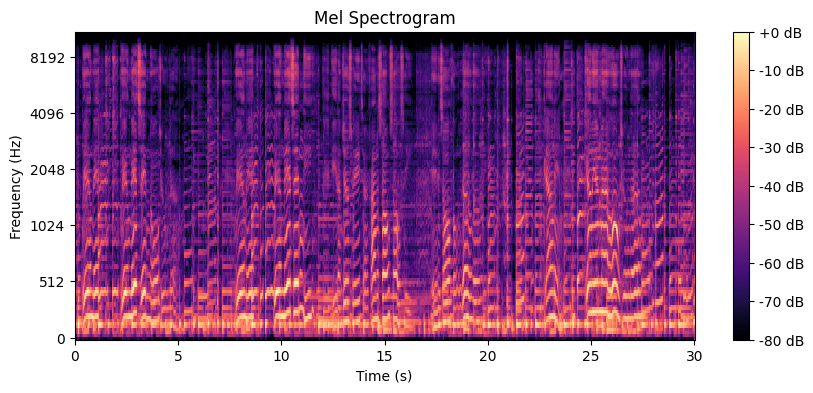

In [8]:
# Spectrogram
plt.figure(figsize=(10, 4))
S = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

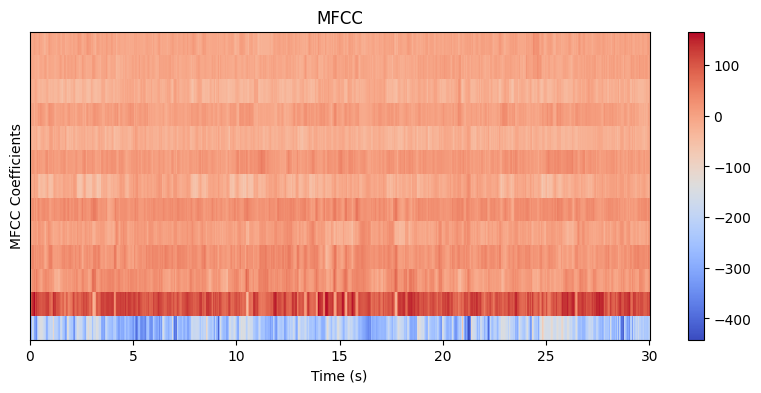

In [9]:
# MFCCs
plt.figure(figsize=(10, 4))
mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13)
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()

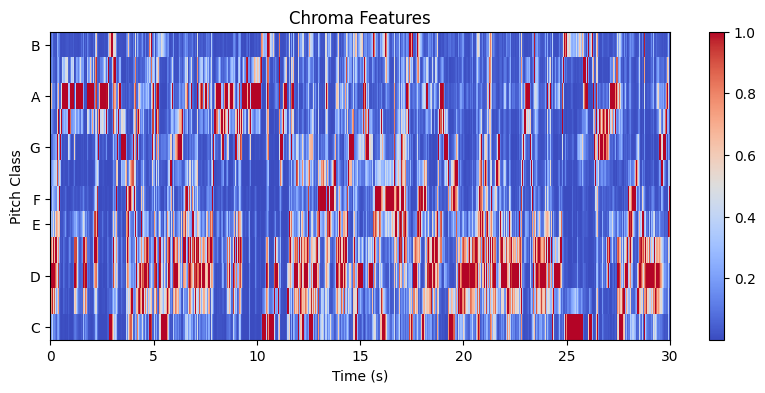

In [10]:
# Chroma Features
plt.figure(figsize=(10, 4))
chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr)
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma Features')
plt.xlabel('Time (s)')
plt.ylabel('Pitch Class')
plt.show()

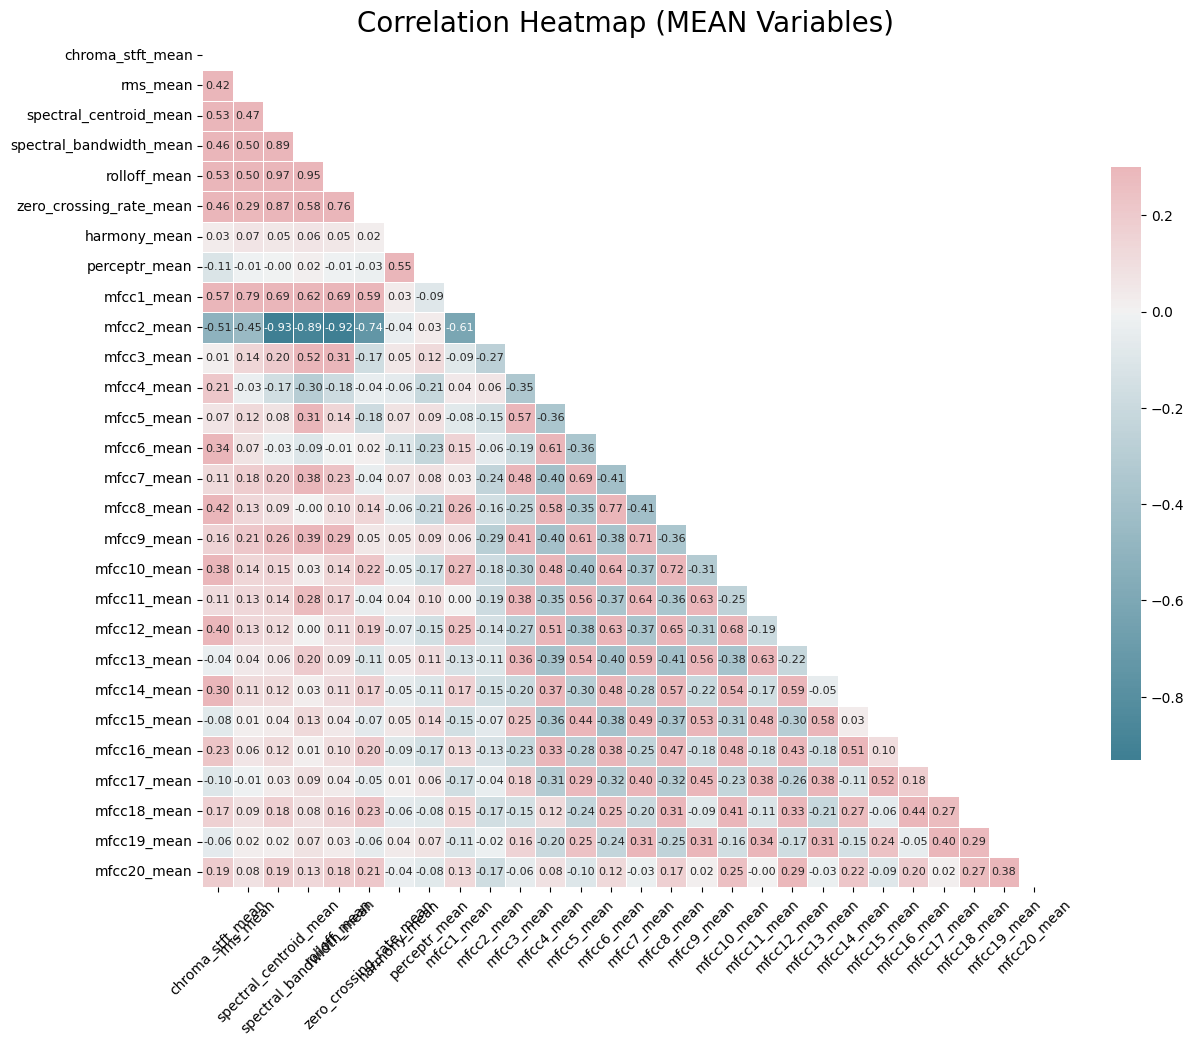

In [11]:
def plot_correlation_heatmap(df, feature_type='mean'):

    selected_cols = [col for col in df.columns if feature_type in col]
    corr = df[selected_cols].corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(16, 11))

    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                annot=True, fmt=".2f", annot_kws={"size": 8},
                square=True, linewidths=.5, cbar_kws={"shrink": .7})
    
    plt.title(f'Correlation Heatmap ({feature_type.upper()} Variables)', fontsize=20)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10, rotation=0)

    plt.savefig(f"Corr_Heatmap_{feature_type.upper()}.png", dpi=300, bbox_inches='tight')
    plt.show()
    
plot_correlation_heatmap(df, feature_type='mean')

# Dimensionality Reduction: Since some features are highly correlated, consider using PCA (Principal Component Analysis) or another dimensionality reduction technique to reduce redundancy

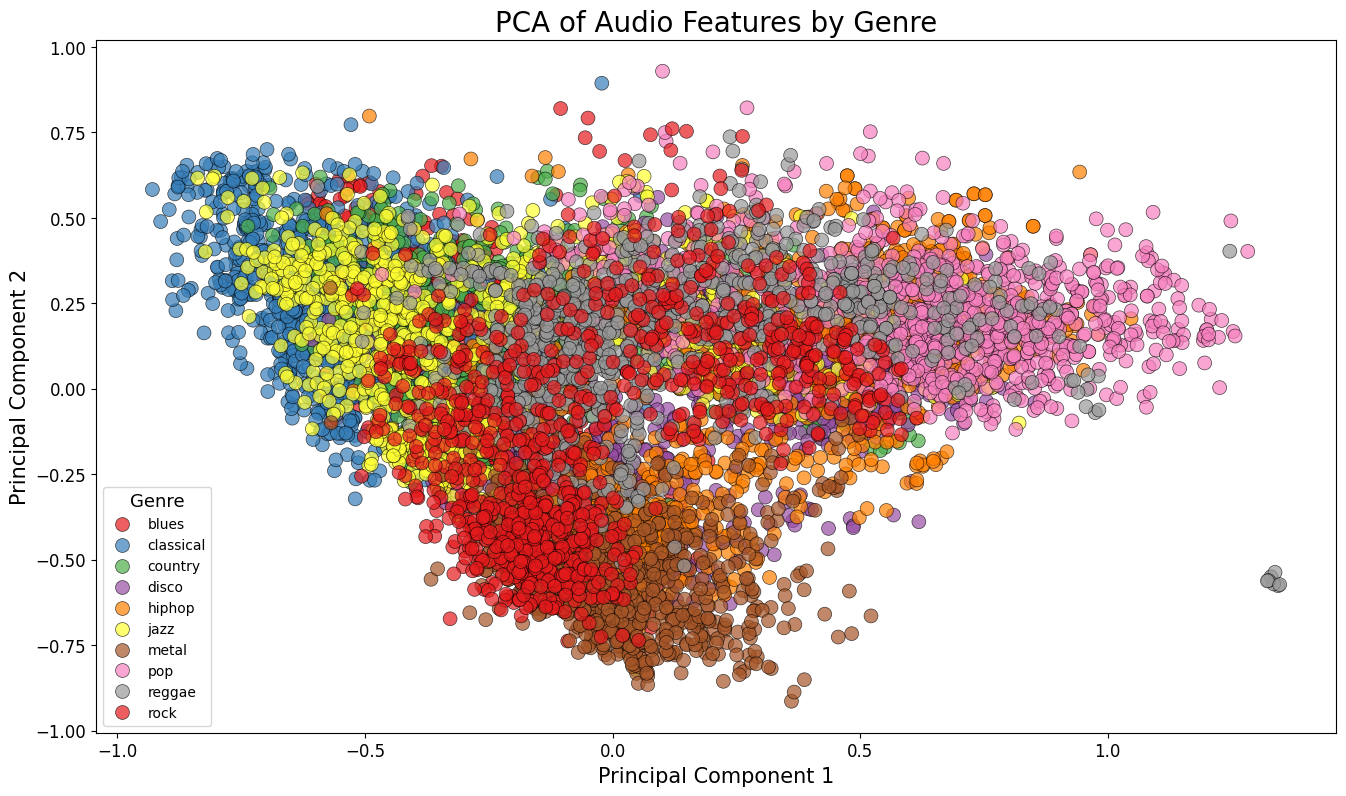

In [12]:
data = df.iloc[:, 1:] 
y = data['label']
X = data.drop(columns=['label'])

# Normalize the feature data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X = pd.DataFrame(X_normalized, columns=X.columns)

# PCA for top 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate with target label
final_df = pd.concat([principal_df, y.reset_index(drop=True)], axis=1)

# Plot PCA components
plt.figure(figsize=(16, 9))
sns.scatterplot(
    x='PC1', y='PC2',
    data=final_df, hue='label', 
    palette='Set1', alpha=0.7, s=100,
    edgecolor='k', linewidth=0.5
)
plt.title('PCA of Audio Features by Genre', fontsize=20)
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Genre', title_fontsize='13', fontsize='10', loc='best')
plt.savefig("PCA_Scatter_Plot_Genres.png", dpi=300, bbox_inches='tight')
plt.show()

# Update labels in df to index

In [13]:
labels = df['label'].unique()
label_to_index = {label: i for i, label in enumerate(labels)}
index_to_label = {i: label for i, label in enumerate(labels)}
print("Label to Index Mapping:", label_to_index)
print("Index to Label Mapping:", index_to_label)

Label to Index Mapping: {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
Index to Label Mapping: {0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [15]:
df['label'] = df['label'].map(label_to_index)


In [16]:
df.label.value_counts()

label
0    1000
5    1000
6    1000
7    1000
8    1000
3     999
1     998
4     998
9     998
2     997
Name: count, dtype: int64

# Shuffle And Split Data

In [17]:
seed = 12
np.random.seed(seed)
df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)

# Drop irrelevant columns and separate labels
df_shuffled.drop(columns=['filename', 'length'], inplace=True)  # Use columns parameter for clarity
y = df_shuffled.pop('label')
X = df_shuffled

# Split into training, validation, and test sets
X_train, X_test_valid, y_train, y_test_valid =train_test_split(
    X, y, train_size=0.7, random_state=seed, stratify=y
)
X_dev, X_test, y_dev, y_test = train_test_split(
    X_test_valid, y_test_valid, train_size=0.66, random_state=seed, stratify=y_test_valid
)
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Validation set: X_dev = {X_dev.shape}, y_dev = {y_dev.shape}")
print(f"Test set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set: X_train = (6993, 57), y_train = (6993,)
Validation set: X_dev = (1978, 57), y_dev = (1978,)
Test set: X_test = (1019, 57), y_test = (1019,)


In [18]:
scaler =StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [19]:
import joblib  
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Building Model

In [20]:
input_shape = (X_train.shape[1],)  # Shape of input features
num_classes = 10  # Number of classes in the output layer

model= tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(num_classes, activation='softmax'),  ]
)

model.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               29696     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [21]:
batch_size = 128
model_history = model.fit(X_train, y_train,
                              validation_data=(X_dev, y_dev),
                              epochs=500,
                              batch_size=batch_size)

Epoch 1/500
55/55 [==============================] - 1s 7ms/step - loss: 2.3069 - accuracy: 0.1348 - val_loss: 2.2057 - val_accuracy: 0.2674
Epoch 2/500
55/55 [==============================] - 0s 4ms/step - loss: 2.2034 - accuracy: 0.2141 - val_loss: 2.0986 - val_accuracy: 0.3448
Epoch 3/500
55/55 [==============================] - 0s 4ms/step - loss: 2.0995 - accuracy: 0.2841 - val_loss: 1.9681 - val_accuracy: 0.3832
Epoch 4/500
55/55 [==============================] - 0s 4ms/step - loss: 1.9830 - accuracy: 0.3263 - val_loss: 1.8279 - val_accuracy: 0.3857
Epoch 5/500
55/55 [==============================] - 0s 4ms/step - loss: 1.8694 - accuracy: 0.3509 - val_loss: 1.7069 - val_accuracy: 0.4166
Epoch 6/500
55/55 [==============================] - 0s 4ms/step - loss: 1.7652 - accuracy: 0.3768 - val_loss: 1.6081 - val_accuracy: 0.4323
Epoch 7/500
55/55 [==============================] - 0s 4ms/step - loss: 1.6911 - accuracy: 0.3924 - val_loss: 1.5313 - val_accuracy: 0.4525
Epoch 8/500
5

Max. Validation Accuracy 0.9135490655899048


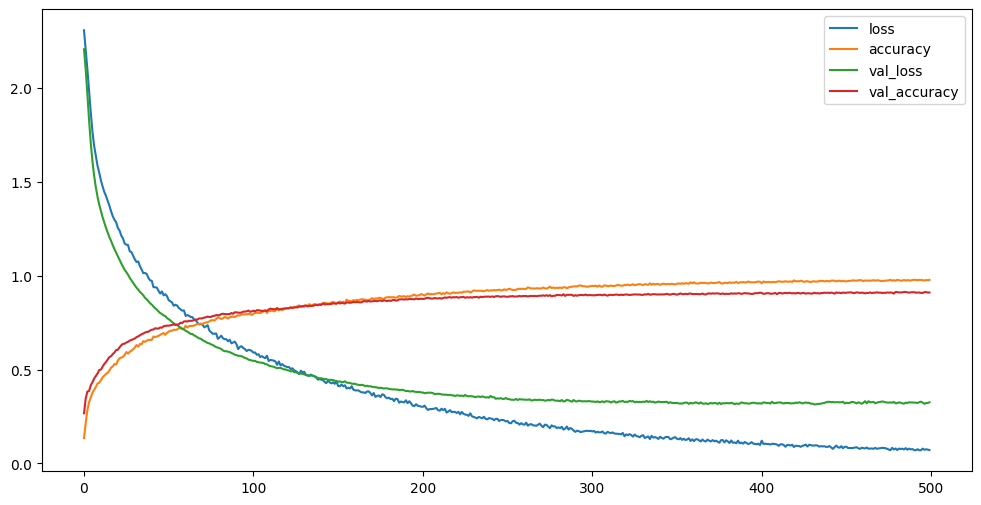

In [22]:
def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show() 

plotHistory(model_history)

# Evaluation

In [23]:
test_loss, test_acc  = model.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("\nThe Best test Accuracy is :",test_acc*100)

8/8 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.9195
The test Loss is : 0.31149664521217346

The Best test Accuracy is : 91.95289611816406
